In [1]:
import matplotlib.pyplot as plt
from pyspectra.readers.read_spc import read_spc
import pandas as pd
import numpy as np
from numpy.random import randn
from scipy.signal import argrelextrema

Импортируем наши вещества

In [2]:
substances = ["ace350f", "eg250f", "eth80f", "mol80f", "nap80f"]
origins = []
for i, j in enumerate(substances):
    spc = read_spc(f'./spectras/{j}.spc')
    origins.append(spc)
# Делаем так, чтобы индексы у элементов были одинаковые
origins[0].index = np.round(origins[0].index.to_series(), 2)
for i in range(1, 5):
    origins[i].index = origins[0].index

gx-y(2)
gx-y(2)
gx-y(2)
gx-y(2)
gx-y(2)


Сгенерируем новое вещество - линейную комбинацию первых четырёх с рандомными концентрациями

In [3]:
true_coef = np.append(randn(1, 4)[0], 0)
true_coef = [1, 1000, 1e-6, 0.5, 0]
new_sub = np.zeros(origins[0].shape[0])
for i in range(4):
    new_sub += true_coef[i] * origins[i]
new_sub
print(f"true coefficients: {true_coef}")

true coefficients: [1, 1000, 1e-06, 0.5, 0]


Сформируем матрицу системы и решим переопределенную систему методом наименьших квадратов

In [4]:
M = np.c_[origins].T

In [9]:
m, dif, _, _ = np.linalg.lstsq(M, new_sub.values, rcond=None)

In [10]:
print(f"true coefficients: {true_coef}\nour coefficients: {m}\ndifference: {dif}")

true coefficients: [1, 1000, 1e-06, 0.5, 0]
our coefficients: [ 1.00000000e+00  1.00000000e+03  1.00000007e-06  5.00000000e-01
 -3.41060513e-13]
difference: [1.52234709e-22]


Интерполируем

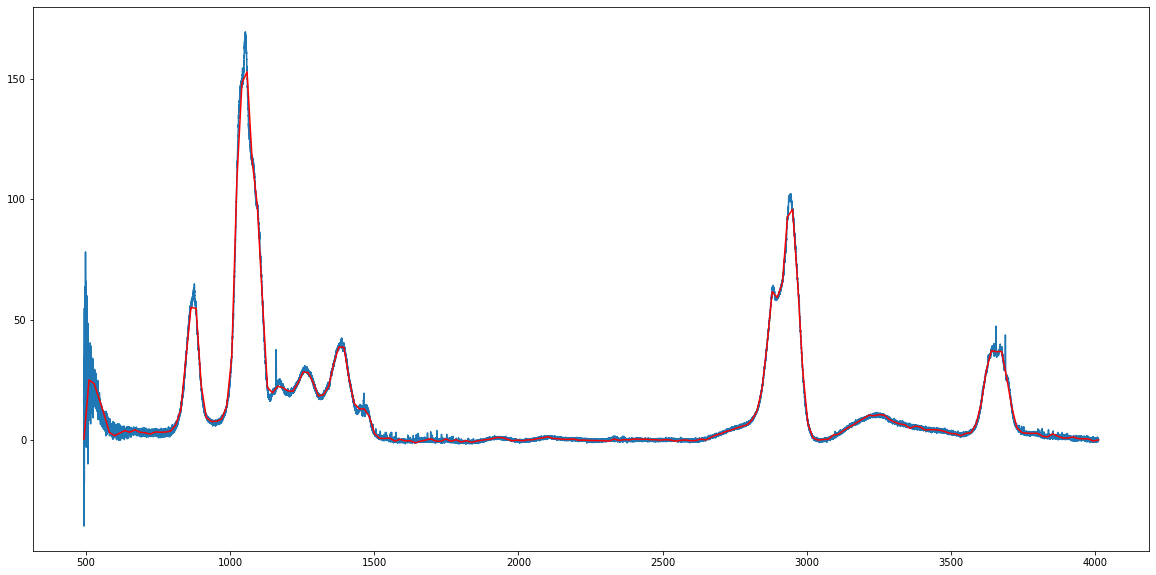

In [59]:
x_ = np.linspace(493.69, 4011.18, 200)
int_sub = np.interp(x_, new_sub.index, new_sub.values)
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(new_sub)
plt.plot(x_, int_sub, color='red')

Максимумы:

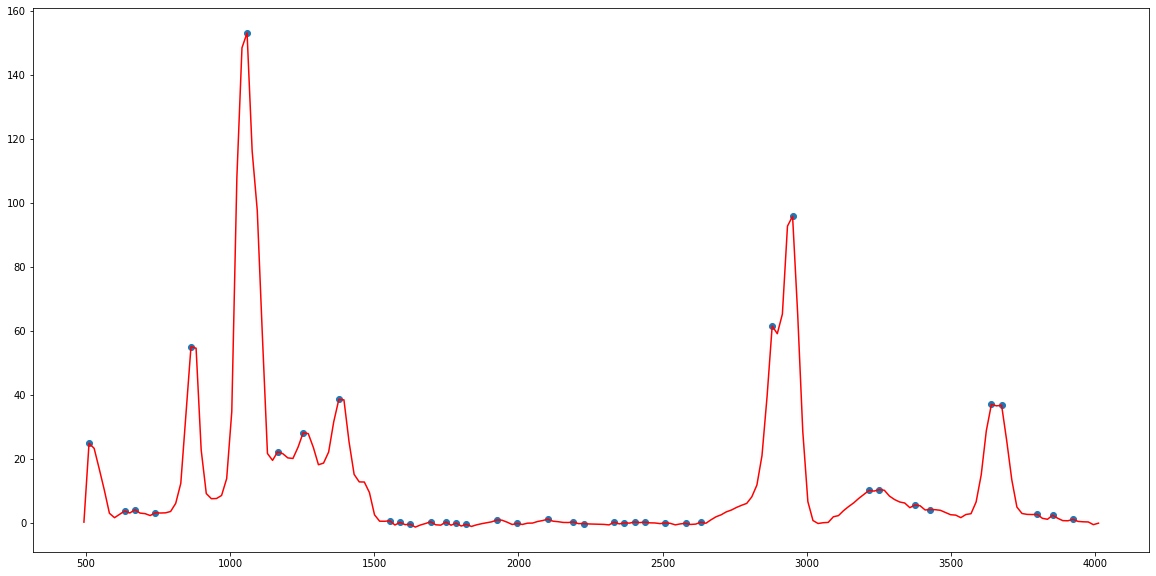

In [53]:
max_ = argrelextrema(int_sub, np.greater)
plt.scatter(x_[max_], int_sub[max_])
plt.plot(x_, int_sub, color="red")

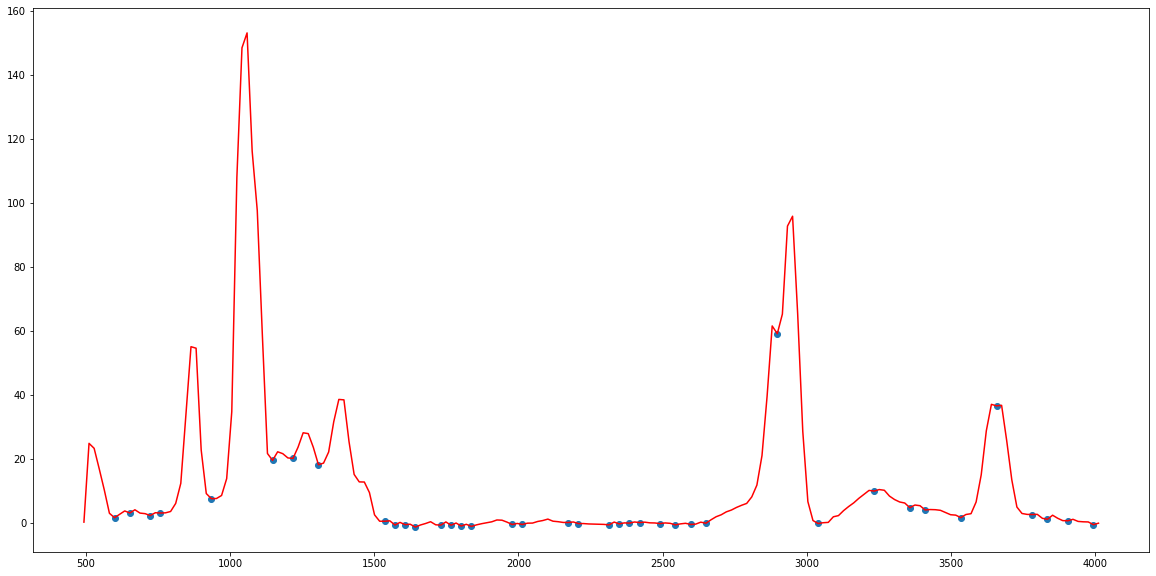

In [54]:
min_ = argrelextrema(int_sub, np.less)
plt.scatter(x_[min_], int_sub[min_])
plt.plot(x_, int_sub, color="red")